<b> Notebook to build a transcriptome - epigenome interaction Network </b>

This python notebook is depending on the following libraries:\
1) pandas\
2) json\
3) requests\
4) networkx\
5) matplotlib (only when visualizing the graph in this notebook)

The following python scripts should be placed inside the folder containing the jupyter notebook
1) CreateGenomicInteractionNetworks.py\
2) APIforDiseaseGeneNet.py\
3) APIForCTD.py\
4) GetCpgToGeneConnections.py\
5) APIforOmniPathDB.py\
6) mapTranscriptionFactors.py\
7) FIlterGeneGeneInteractions.py\



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from CreateGenomicInteractionNetworks import CreateGenomicInteractionNetwork


<b> Create the Genomic Interaction Network Object and define data paths </b>

In [2]:
# exampleNetwork will be the GIN object
exampleNetwork=CreateGenomicInteractionNetwork()
# path to the genes
pathToGeneFile="GeneFile.txt"
# path to the methylated genes
pathToMethylatedGenes="MethylatedGeneFile.txt"
# load the data
genes=pd.read_csv(pathToGeneFile,sep="\t")
methylatedGenes=pd.read_csv(pathToMethylatedGenes,sep="\t")

In [3]:
# Combine the gene and methylated gene ids to one list
cpgFeatures=list(methylatedGenes.Gene)
geneFeatures=list(genes.Gene)
totalFeatures=pd.concat([genes,methylatedGenes],axis=0)
totalFeaturesList=list(totalFeatures.Gene)

<b> Define the interactions in the Genomic Interaction Network <b>

Get the gene - CpG interactions

In [4]:
exampleNetwork.get_cpg_gene_interactions(option='FromGeneList',genelist=cpgFeatures)
exampleNetwork.set_genes_as_nodes(totalFeaturesList)

Get the gene-gene interactions from OmniPathDB

In [5]:
exampleNetwork.get_gene_gene_interactions()

http://omnipathdb.org/interactions/?genesymbols=1&partners=FASN,ACACA,CDC5L,ACSL3,ACSL1,ACLY,MCAT,OLAH,MCCC2,SUCLG1,SUCLA2,PCCB,SUCLG2,FASN,ACACA,CDC5L,ACSL3,ACSL1,ACLY,PKLR,PCSK9,PNPLA3&format=json
<Response [200]>
<Response [200]>


Get the transcription factor - target interactions

In [6]:
exampleNetwork.get_transcription_factor_regulation(pathToTFlib='transcription_catalogue.txt',sepa='\t',encoding='unicode_escape',genes=totalFeaturesList)

         TF interaction target_gene  regulation
2053  CDC5L          ii        HBG1  Inhibition


Get the compound - gene interactions from CTD

In [7]:
exampleNetwork.get_compound_gene_interactions(totalFeaturesList,input_type_compound='Chem',input_terms_compound='Arsenic',report_only_parameter='genes_curated',format_of_report='json')
exampleNetwork.format_compound_to_cpg_interactions()

http://ctdbase.org/tools/batchQuery.go?inputType=Chem&inputTerms=Arsenic&report=genes_curated&format=json
request is successful


Get the disease - gene interactions from DiseaseGeneNet

In [8]:
account_name="tjm.kuijpers@gmail.com"
password_user="#Road2burn"

In [9]:
exampleNetwork.find_disease_associated_with_genes(account=account_name,password=password_user)

Build the network

In [10]:
exampleNetwork.format_gene_gene_networks()
exampleNetwork.built_the_network()

<b> Simple visualization of the network with networkx </b>

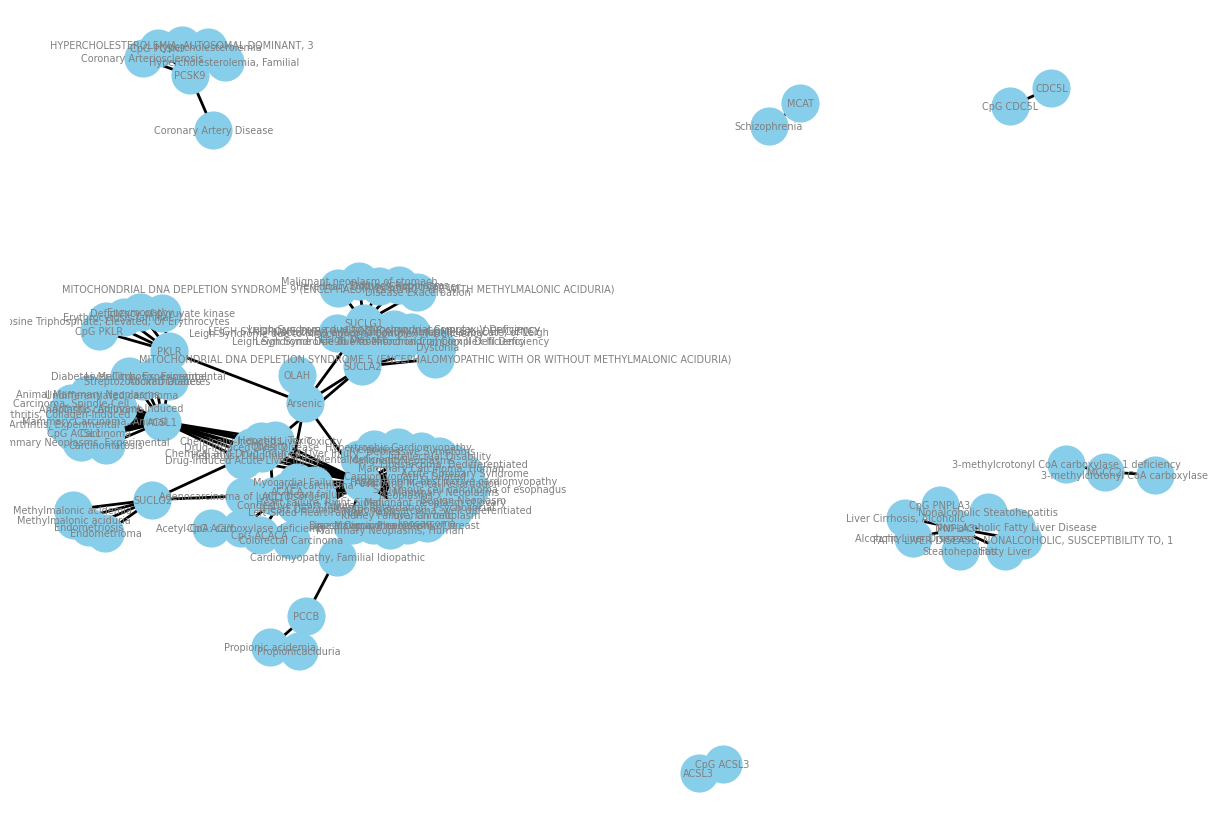

In [11]:
exampleNetwork.visualize_the_network()

<b> Export the network to a csv file </b>

In [12]:
# set the name of the file
nameToSaveNetwork="exampleNetwork.csv"
exampleNetwork.network_data_frame.to_csv(nameToSaveNetwork,sep=",")